In [1]:
!pip install wandb -qqq
!apt install tree

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 180 kB 65.4 MB/s 
     |████████████████████████████████| 139 kB 62.5 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (122 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1)

In [4]:
import pandas as pd
import numpy as np
import wandb

In [3]:
!git clone https://github.com/wandb/examples.git
!pip install soundfile -qq

Cloning into 'examples'...
remote: Enumerating objects: 3552, done.
remote: Counting objects: 100% (865/865), done.
remote: Compressing objects: 100% (629/629), done.
remote: Total 3552 (delta 541), reused 348 (delta 211), pack-reused 2687
Receiving objects: 100% (3552/3552), 95.56 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (1764/1764), done.


In [6]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Log metrics

In [5]:
apple = pd.read_csv("/content/examples/examples/data/apple.csv")
apple = apple[-1000:]

In [7]:
apple.head()

,date,close
8849,2016-01-15,97.13
8850,2016-01-19,96.66
8851,2016-01-20,96.79
8852,2016-01-21,96.30
8853,2016-01-22,101.42


In [8]:
wandb.init(project = "visualize-predictions", name = "metrics")
for price in apple['close']:
  wandb.log({"Stock price" : price})

wandb.finish()

wandb: Currently logged in as: chowk (use `wandb login --relogin` to force relogin)


Stock price,▁▁▂▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▆▆▄▃▄▄▅▅▅▅▆▆▇█
Stock price,299.8


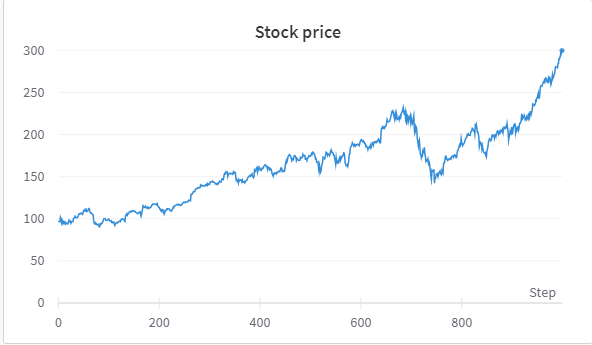

## Log plots

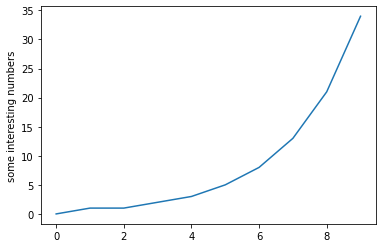

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

wandb.init(project="visualize-predictions", name="plots")

# Make the plot
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
fig, ax = plt.subplots()
ax.plot(fibonacci)
ax.set_ylabel("some interesting numbers")

# Log the plot
wandb.log({"plot": fig})
wandb.finish()
fig

## Log Histograms

In [10]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="histograms")

fibonacci = np.array([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

# Log a histogram on each step
for i in range(1, 10):
  wandb.log({"histograms":
             wandb.Histogram(fibonacci / i)})
  
wandb.finish()

## Log images

In [11]:
import matplotlib.pyplot as plt

# Initialize a new run
wandb.init(project="visualize-predictions", name="images")

# Generate an image
path_to_img = "examples/examples/data/cafe.jpg"
im = plt.imread(path_to_img)

# Log the image
wandb.log({"img": [wandb.Image(im, caption="Cafe")]})

wandb.finish()

## Log tables

In [12]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="tables")

# Create tabular data, method 1
data = [["I love my phone", "1", "1"],["My phone sucks", "0", "-1"]]
wandb.log({"a_table": wandb.Table(data=data, columns=["Text", "Predicted Label", "True Label"])})

# Create tabular data, method 2
table = wandb.Table(columns=["Text", "Predicted Label", "True Label"])
table.add_data("I love my phone", "1", "1")
table.add_data("My phone sucks", "0", "-1")
wandb.log({"another_table": table})

wandb.finish()

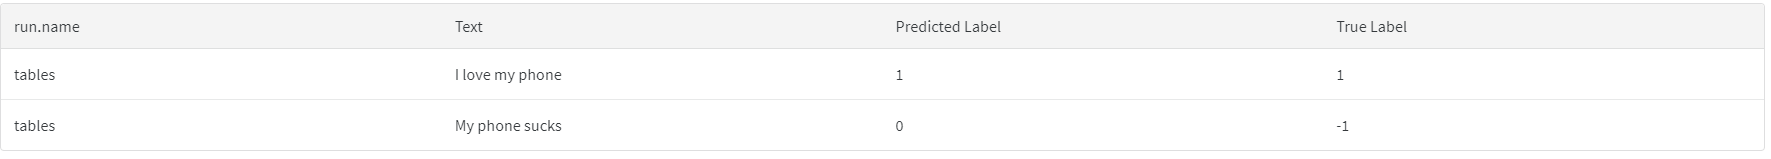